In [1]:
# this notebook adds additional features to the main bulk of the game data

In [2]:
import pandas as pd

In [3]:
# get games data for last few years
games_0 = pd.read_excel('data/nhl_game_results_2023.xlsx', header=0)
games_1 = pd.read_excel('data/nhl_game_results_2024.xlsx', header=0)
games_2 = pd.read_excel('data/nhl_game_results_2025.xlsx', header=0)

# union together
all_games = pd.concat([games_0, games_1, games_2], ignore_index=True)

# reset index
all_games.reset_index(drop=True, inplace=True)

# create Game_ID column
all_games["Game_ID"] = (
    all_games["Date"].dt.strftime("%Y-%m-%d") + "-" +
    all_games["Time"].astype(str) + "|" +
    all_games["Home Team"].astype(str) + " vs " +
    all_games["Away Team"].astype(str)
)

# inspect
all_games.info()
all_games.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Game Link      3349 non-null   object        
 1   Extra Time     3349 non-null   object        
 2   Home Team      3349 non-null   object        
 3   Away Team      3349 non-null   object        
 4   Home Score     3349 non-null   int64         
 5   Away Score     3349 non-null   int64         
 6   P1 Home Score  3349 non-null   int64         
 7   P1 Away Score  3349 non-null   int64         
 8   P2 Home Score  3349 non-null   int64         
 9   P2 Away Score  3349 non-null   int64         
 10  P3 Home Score  3349 non-null   int64         
 11  P3 Away Score  3349 non-null   int64         
 12  P4 Home Score  3349 non-null   int64         
 13  P4 Away Score  3349 non-null   int64         
 14  P5 Home Score  3349 non-null   int64         
 15  P5 Away Score  3349 n

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,P5 Away Score,P6 Home Score,P6 Away Score,P7 Home Score,P7 Away Score,Date,Time,Year,Total Score,Game_ID
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,0,0,0,0,0,2023-06-24,20:00,2023,3,2023-06-24-20:00|Florida Panthers vs Edmonton ...
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,0,0,0,0,0,2023-06-21,20:00,2023,6,2023-06-21-20:00|Edmonton Oilers vs Florida Pa...
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,0,0,0,0,0,2023-06-18,20:00,2023,8,2023-06-18-20:00|Florida Panthers vs Edmonton ...
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,0,0,0,0,0,2023-06-15,20:00,2023,9,2023-06-15-20:00|Edmonton Oilers vs Florida Pa...
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,0,0,0,0,0,2023-06-13,20:00,2023,7,2023-06-13-20:00|Edmonton Oilers vs Florida Pa...


In [4]:
# calc score at end of regular time
all_games['regular_time_score_total'] = all_games['Home Score'] + all_games['Away Score']
all_games['regular_time_score_home'] = all_games['P1 Home Score'] + all_games['P2 Home Score'] + all_games['P3 Home Score']
all_games['regular_time_score_away'] = all_games['P1 Away Score'] + all_games['P2 Away Score'] + all_games['P3 Away Score']

# calc win draw tie for regular time
all_games['Reg_Home_Win'] = all_games['regular_time_score_home'] > all_games['regular_time_score_away']
all_games['Reg_Away_Win'] = all_games['regular_time_score_home'] < all_games['regular_time_score_away']
all_games['Reg_Tie'] = all_games['regular_time_score_home'] == all_games['regular_time_score_away']

# add cols for showing the winning team at full time
all_games['FT_Home_Win'] = all_games['Home Score'] > all_games['Away Score']
all_games['FT_Away_Win'] = all_games['Home Score'] < all_games['Away Score']

# inspect
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Total Score,Game_ID,regular_time_score_total,regular_time_score_home,regular_time_score_away,Reg_Home_Win,Reg_Away_Win,Reg_Tie,FT_Home_Win,FT_Away_Win
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,3,2023-06-24-20:00|Florida Panthers vs Edmonton ...,3,2,1,True,False,False,True,False
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,6,2023-06-21-20:00|Edmonton Oilers vs Florida Pa...,6,5,1,True,False,False,True,False
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,8,2023-06-18-20:00|Florida Panthers vs Edmonton ...,8,3,5,False,True,False,False,True
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,9,2023-06-15-20:00|Edmonton Oilers vs Florida Pa...,9,8,1,True,False,False,True,False
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,7,2023-06-13-20:00|Edmonton Oilers vs Florida Pa...,7,3,4,False,True,False,False,True


In [5]:
# extract day of wee and month from date cols
all_games['Day_of_Week'] = all_games['Date'].dt.day_name()
all_games['Month'] = all_games['Date'].dt.month_name()
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,regular_time_score_total,regular_time_score_home,regular_time_score_away,Reg_Home_Win,Reg_Away_Win,Reg_Tie,FT_Home_Win,FT_Away_Win,Day_of_Week,Month
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,3,2,1,True,False,False,True,False,Saturday,June
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,6,5,1,True,False,False,True,False,Wednesday,June
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,8,3,5,False,True,False,False,True,Sunday,June
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,9,8,1,True,False,False,True,False,Thursday,June
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,7,3,4,False,True,False,False,True,Tuesday,June


In [6]:
# TODO: identify generally when pre-season and post-season games occur; really only want to focus on regular season
# preseason ususally ends after 1st week of october and then regular season ends early to mid-april


In [7]:
# assign each team to its respective conference and division

# read in conf and div info
conf_map = pd.read_excel('data/NHL Team Conf Div 2025.xlsx', header=0, sheet_name='Conf')
div_map = pd.read_excel('data/NHL Team Conf Div 2025.xlsx', header=0, sheet_name='Div')

# inspect
print(conf_map.head(), '\n')
print(div_map.head())

                 Team Conference
0  Colorado Avalanche    Western
1       Anaheim Ducks    Western
2        Dallas Stars    Western
3  Chicago Blackhawks    Western
4       Winnipeg Jets    Western 

                  Team  Division
0   Montreal Canadiens  Atlantic
1        Boston Bruins  Atlantic
2  Toronto Maple Leafs  Atlantic
3      Ottawa Senators  Atlantic
4  Tampa Bay Lightning  Atlantic


In [8]:
# map home and away conf and div
all_games = all_games.merge(conf_map.rename(columns={'Team':'Home Team', 'Conference':'Home Conf'}), on='Home Team', how='left')
all_games = all_games.merge(conf_map.rename(columns={'Team':'Away Team', 'Conference':'Away Conf'}), on='Away Team', how='left')
all_games = all_games.merge(div_map.rename(columns={'Team':'Home Team', 'Division':'Home Div'}), on='Home Team', how='left')
all_games = all_games.merge(div_map.rename(columns={'Team':'Away Team', 'Division':'Away Div'}), on='Away Team', how='left')

# inspect
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Reg_Away_Win,Reg_Tie,FT_Home_Win,FT_Away_Win,Day_of_Week,Month,Home Conf,Away Conf,Home Div,Away Div
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,False,False,True,False,Saturday,June,Eastern,Western,Atlantic,Pacific
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,False,False,True,False,Wednesday,June,Western,Eastern,Pacific,Atlantic
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,True,False,False,True,Sunday,June,Eastern,Western,Atlantic,Pacific
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,False,False,True,False,Thursday,June,Western,Eastern,Pacific,Atlantic
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,True,False,False,True,Tuesday,June,Western,Eastern,Pacific,Atlantic


In [9]:
# create conf and div cols
all_games['Conf_Matchup'] = all_games['Home Conf'] == all_games['Away Conf']
all_games['Div_Matchup'] = all_games['Home Div'] == all_games['Away Div']

# create col that concats home and away conf then repeat for div
all_games['Conf_Pair'] = all_games['Home Conf'] + "-" + all_games['Away Conf']
all_games['Div_Pair'] = all_games['Home Div'] + "-" + all_games['Away Div']

# inspect
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Day_of_Week,Month,Home Conf,Away Conf,Home Div,Away Div,Conf_Matchup,Div_Matchup,Conf_Pair,Div_Pair
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,Saturday,June,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,Wednesday,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,Sunday,June,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,Thursday,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,Tuesday,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic


In [10]:
# create home vs away pair
all_games['Team_Pair'] = all_games['Home Team'] + " vs " + all_games['Away Team']
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Month,Home Conf,Away Conf,Home Div,Away Div,Conf_Matchup,Div_Matchup,Conf_Pair,Div_Pair,Team_Pair
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,June,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,June,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers


<Axes: >

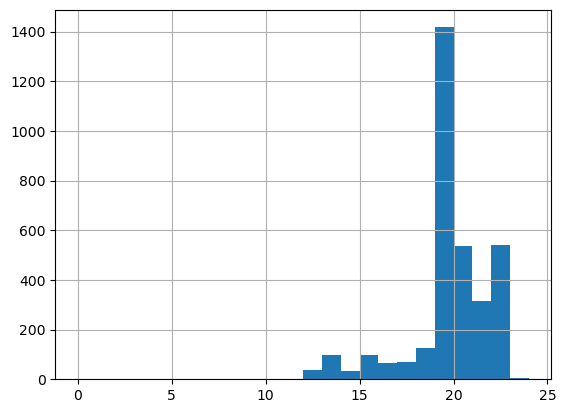

In [11]:
# split out hour part of time and get histogram of game start hours
all_games['Game_Start_Hour'] = all_games['Time'].str.split(':').str[0].astype(int)
all_games['Game_Start_Hour'].hist(bins=range(0,25))

In [12]:
# classify game time start hour
def classify_start_hour(hour):
    if 2 <= hour < 15:
        return 'Early'
    elif 15 <= hour < 20:
        return 'Mid'
    elif 20 <= hour < 24 or hour <= 1:
        return 'Late'
    else:
        return 'Unknown'

all_games['Start_Hour_Group'] = all_games['Game_Start_Hour'].apply(classify_start_hour)
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Away Conf,Home Div,Away Div,Conf_Matchup,Div_Matchup,Conf_Pair,Div_Pair,Team_Pair,Game_Start_Hour,Start_Hour_Group
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers,20,Late
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers,20,Late
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers,20,Late
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers,20,Late
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers,20,Late


In [13]:
all_games['Start_Hour_Group'].value_counts()

Mid      1775
Late     1401
Early     173
Name: Start_Hour_Group, dtype: int64

In [14]:
# inspect basic stats for numeric cols
all_games.describe()

,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,P3 Home Score,P3 Away Score,P4 Home Score,P4 Away Score,...,P6 Home Score,P6 Away Score,P7 Home Score,P7 Away Score,Year,Total Score,regular_time_score_total,regular_time_score_home,regular_time_score_away,Game_Start_Hour
count,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,...,3349.0,3349.0,3349.0,3349.0,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000
mean,3.210511,2.916990,0.919678,0.830397,1.074351,0.961780,1.103613,1.026874,0.081815,0.069573,...,0.0,0.0,0.0,0.0,2023.649149,6.127501,6.127501,3.097641,2.819050,19.258286
std,1.757098,1.715671,0.954677,0.903608,1.017541,0.971073,1.056788,1.033429,0.274124,0.254464,...,0.0,0.0,0.0,0.0,0.654629,2.297768,2.297768,1.762739,1.699176,2.207946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,2023.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,2023.000000,5.000000,5.000000,2.000000,2.000000,19.000000
50%,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,2024.000000,6.000000,6.000000,3.000000,3.000000,19.000000
75%,4.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,2024.000000,7.000000,7.000000,4.000000,4.000000,21.000000
max,10.000000,10.000000,5.000000,6.000000,7.000000,6.000000,7.000000,6.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,2025.000000,17.000000,17.000000,10.000000,10.000000,23.000000


<Axes: >

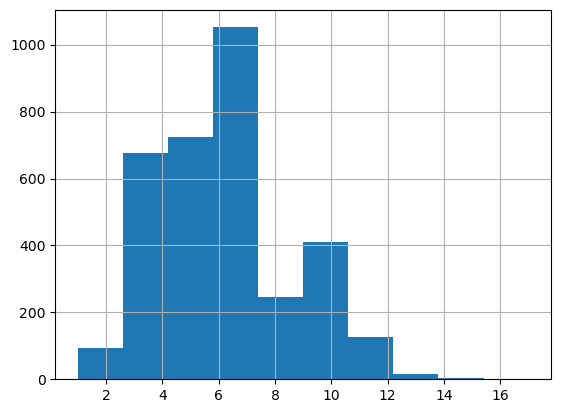

In [15]:
# inspect disttribution of Total Score using histogram
all_games['Total Score'].hist(bins=10)

In [20]:
# replace any col names that have spaces with _
col_rename_dict = {col: col.replace(' ', '_') for col in all_games.columns}

# rename acutal cols
all_games = all_games.rename(columns=col_rename_dict)
all_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3349 entries, 0 to 3348
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Game_Link                 3349 non-null   object        
 1   Extra_Time                3349 non-null   object        
 2   Home_Team                 3349 non-null   object        
 3   Away_Team                 3349 non-null   object        
 4   Home_Score                3349 non-null   int64         
 5   Away_Score                3349 non-null   int64         
 6   P1_Home_Score             3349 non-null   int64         
 7   P1_Away_Score             3349 non-null   int64         
 8   P2_Home_Score             3349 non-null   int64         
 9   P2_Away_Score             3349 non-null   int64         
 10  P3_Home_Score             3349 non-null   int64         
 11  P3_Away_Score             3349 non-null   int64         
 12  P4_Home_Score       

In [21]:
# write master excel file
all_games.to_excel(r'data/master_games_data.xlsx', index=False)

In [ ]:
# TODO - create cumulative teams table where each row is at the team + date level and I get cumulative:
# games played, home wins/losses, away wins/losses, conf wins/losses, division wins/losses, conf rank, div rank

# create copy of the df
copy_all_games = all_games.copy()



In [25]:
copy_all_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3349 entries, 812 to 3063
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Game_Link                 3349 non-null   object        
 1   Extra_Time                3349 non-null   object        
 2   Home_Team                 3349 non-null   object        
 3   Away_Team                 3349 non-null   object        
 4   Home_Score                3349 non-null   int64         
 5   Away_Score                3349 non-null   int64         
 6   P1_Home_Score             3349 non-null   int64         
 7   P1_Away_Score             3349 non-null   int64         
 8   P2_Home_Score             3349 non-null   int64         
 9   P2_Away_Score             3349 non-null   int64         
 10  P3_Home_Score             3349 non-null   int64         
 11  P3_Away_Score             3349 non-null   int64         
 12  P4_Home_Score     

In [ ]:
# TODO - think about what features could be indicative/relevent for identifying matchups that would require some free hockey to settle things

# the team's conf, div, and/or overall rank; in order to calc these ranks need to calc the number of wins at that grain; another way to think about it is total goals scored vs allowed

In [62]:
# TODO - write function that takes the df, sorts it by the target grain, then performs the groupby
def grain_sort_cumsum_props(home_vs_away: str, df: pd.DataFrame) -> pd.DataFrame:
    # add home or away team to sort grain
    sort_grain = [home_vs_away] + ['Date', 'Game_ID'] 

    # sort
    df = df.sort_values(by=sort_grain)

    # hard code cumsum cols
    cum_cols = ["Reg_Home_Win", "Reg_Away_Win", "Reg_Tie", 'P1_Home_Score', 'P1_Away_Score', 
                'P2_Home_Score', 'P2_Away_Score', 'P3_Home_Score', 'P3_Away_Score',
                'regular_time_score_home', 'regular_time_score_away']
    
    # add count of games for home or away
    df[f'cum_{home_vs_away}_Games'] = df.groupby(home_vs_away).cumcount() + 1

    # compute cumsum for each group
    df[[f"cum_{col}" for col in cum_cols]] = df.groupby(home_vs_away)[cum_cols].cumsum()

    # calc prop home reg win
    df['prop_Reg_Home_Win'] = df['cum_Reg_Home_Win'] / df[f'cum_{home_vs_away}_Games']
    df['prop_Reg_Away_Win'] = df['cum_Reg_Away_Win'] / df[f'cum_{home_vs_away}_Games']
    df['prop_Reg_Tie'] = df['cum_Reg_Tie'] / df[f'cum_{home_vs_away}_Games']

    # calc props for what % of goals scored in each period
    df['prop_P1_Home_Score'] = df['cum_P1_Home_Score'] / df['cum_regular_time_score_home']
    df['prop_P2_Home_Score'] = df['cum_P2_Home_Score'] / df['cum_regular_time_score_home']
    df['prop_P3_Home_Score'] = df['cum_P3_Home_Score'] / df['cum_regular_time_score_home']

    df['prop_P1_Away_Score'] = df['cum_P1_Away_Score'] / df['cum_regular_time_score_away']
    df['prop_P2_Away_Score'] = df['cum_P2_Away_Score'] / df['cum_regular_time_score_away']
    df['prop_P3_Away_Score'] = df['cum_P3_Away_Score'] / df['cum_regular_time_score_away']

    return df

# test func
test_all_home_games = grain_sort_cumsum_props('Home_Team', copy_all_games)

# isolate cumcols
sel_cum_cols = [x for x in test_all_home_games.columns if x.startswith('cum_') or x.startswith('prop_')]

# add date, gid, and home team to list
peek_cols = ['Date', 'Game_ID', 'Home_Team'] + sel_cum_cols

# inspect cum cols
test_all_home_games[peek_cols].head(5)

,Date,Game_ID,Home_Team,cum_Home_Team_Games,cum_Reg_Home_Win,cum_Reg_Away_Win,cum_Reg_Tie,cum_P1_Home_Score,cum_P1_Away_Score,cum_P2_Home_Score,...,cum_regular_time_score_away,prop_Reg_Home_Win,prop_Reg_Away_Win,prop_Reg_Tie,prop_P1_Home_Score,prop_P2_Home_Score,prop_P3_Home_Score,prop_P1_Away_Score,prop_P2_Away_Score,prop_P3_Away_Score
812,2023-01-03,2023-01-03-21:00|Anaheim Ducks vs Toronto Mapl...,Anaheim Ducks,1,0,0,1,0,0,1,...,1,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
796,2023-01-05,2023-01-05-22:00|Anaheim Ducks vs Winnipeg Jets,Anaheim Ducks,2,0,1,1,1,0,1,...,4,0.0,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000,0.250000,0.750000
780,2023-01-07,2023-01-07-20:00|Anaheim Ducks vs Detroit Red ...,Anaheim Ducks,3,0,2,1,2,1,1,...,7,0.0,0.666667,0.333333,0.500000,0.250000,0.250000,0.142857,0.285714,0.571429
678,2023-01-21,2023-01-21-20:30|Anaheim Ducks vs New York Ran...,Anaheim Ducks,4,0,3,1,4,1,1,...,12,0.0,0.750000,0.250000,0.666667,0.166667,0.166667,0.083333,0.250000,0.666667
663,2023-01-23,2023-01-23-22:00|Anaheim Ducks vs Buffalo Sabres,Anaheim Ducks,5,1,3,1,5,1,3,...,14,0.2,0.600000,0.200000,0.500000,0.300000,0.200000,0.071429,0.214286,0.714286


In [54]:
# calc props for what % of goals scored in each period
copy_all_games_home_sort['prop_P1_Home_Score'] = copy_all_games_home_sort['cum_P1_Home_Score'] / copy_all_games_home_sort['cum_regular_time_score_home']
copy_all_games_home_sort['prop_P2_Home_Score'] = copy_all_games_home_sort['cum_P2_Home_Score'] / copy_all_games_home_sort['cum_regular_time_score_home']
copy_all_games_home_sort['prop_P3_Home_Score'] = copy_all_games_home_sort['cum_P3_Home_Score'] / copy_all_games_home_sort['cum_regular_time_score_home']

copy_all_games_home_sort['prop_P1_Away_Score'] = copy_all_games_home_sort['cum_P1_Away_Score'] / copy_all_games_home_sort['cum_regular_time_score_away']
copy_all_games_home_sort['prop_P2_Away_Score'] = copy_all_games_home_sort['cum_P2_Away_Score'] / copy_all_games_home_sort['cum_regular_time_score_away']
copy_all_games_home_sort['prop_P3_Away_Score'] = copy_all_games_home_sort['cum_P3_Away_Score'] / copy_all_games_home_sort['cum_regular_time_score_away']

# copy_all_games_home_sort[['Date', 'Home_Team', 'prop_P1_Home_Score', 'prop_P2_Home_Score', 'prop_P3_Home_Score', 'cum_regular_time_score_home']].head(30)
copy_all_games_home_sort[['Date', 'Home_Team', 'prop_P1_Away_Score', 'prop_P2_Away_Score', 'prop_P3_Away_Score', 'cum_regular_time_score_away']].head(30)

,Date,Home_Team,prop_P1_Away_Score,prop_P2_Away_Score,prop_P3_Away_Score,cum_regular_time_score_away
812,2023-01-03,Anaheim Ducks,0.000000,0.000000,1.000000,1
796,2023-01-05,Anaheim Ducks,0.000000,0.250000,0.750000,4
780,2023-01-07,Anaheim Ducks,0.142857,0.285714,0.571429,7
678,2023-01-21,Anaheim Ducks,0.083333,0.250000,0.666667,12
663,2023-01-23,Anaheim Ducks,0.071429,0.214286,0.714286,14
620,2023-01-31,Anaheim Ducks,0.125000,0.250000,0.625000,16
597,2023-02-09,Anaheim Ducks,0.095238,0.285714,0.619048,21
512,2023-02-21,Anaheim Ducks,0.178571,0.250000,0.571429,28
478,2023-02-25,Anaheim Ducks,0.156250,0.250000,0.593750,32
445,2023-03-01,Anaheim Ducks,0.171429,0.257143,0.571429,35
